<img src="http://hipersia.com/en/mi_news/show/1395/01/Big/179-806.jpg" />

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
img1 = cv2.imread('./inputs/P2/grayscale1.png', 0)
img2 = cv2.imread('./inputs/P2/grayscale2.png', 0)

we create a slider function and put 1 picture on top of the other and use the slider to move down the first imge

In [5]:
def slider(img):
    slideds = []
    
    for i in range(img.shape[0]):
        blank = np.zeros(img.shape)
        blank[:i + 1, :] = img[img.shape[0] - i - 1:, :]
        slideds.append(blank)
        
    for i in range(img.shape[0]):
        blank = np.zeros(img.shape)
        blank[i + 1:, :] = img[:img.shape[0] - i - 1, :]
        slideds.append(blank)
        
    return slideds

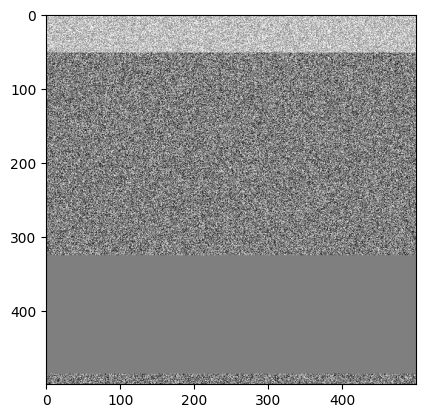

In [11]:
slideds = slider(img1)
both=[]
for k, img in enumerate(slideds):
    img3= img2 - img
    both.append(img3)
plt.imshow(both[551], cmap='gray')

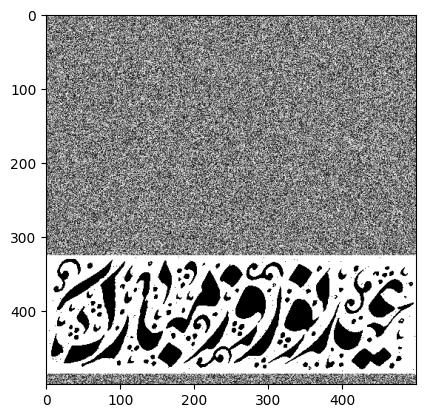

In [18]:
plt.imshow(both[551].astype(np.uint8), cmap='gray')

In [19]:
def encrypter(img, msg):
    # RGB
    img_r = img[:, :, 0]
    img_g = img[:, :, 1]
    img_b = img[:, :, 2]

    for i in range(msg.shape[0]):
        for j in range(msg.shape[1]):
            if msg[i, j] == 1:
                if np.abs(int(img_r[i, j]) - int(img_b[i, j])) % 2 != 0:
                    img_r[i, j] += 1

            elif msg[i, j] == 0:
                if np.abs(int(img_r[i, j]) - int(img_b[i, j])) % 2 == 0:
                    img_r[i, j] -= 1

    merge = np.dstack((img_r, img_g, img_b))

    return merge

In [20]:
def decrypter(img):
    # RGB
    img_r = img[:, :, 0]
    img_g = img[:, :, 1]
    img_b = img[:, :, 2]
    
    blank = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.abs(int(img_r[i, j]) - int(img_b[i, j])) % 2 == 0:
                blank[i, j] = 1
    return blank

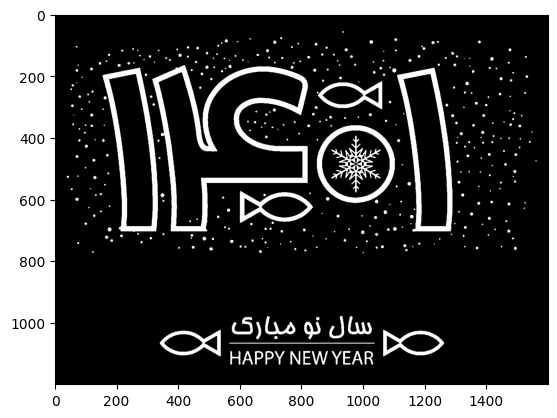

In [23]:
img = cv2.imread('./inputs/P2/img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

msg = cv2.imread('./inputs/P2/msg.png', 0)
msg = cv2.resize(msg, (img.shape[1], img.shape[0]))

_, msg = cv2.threshold(msg, 0, 1, cv2.THRESH_OTSU)
plt.imshow(msg, cmap='gray')

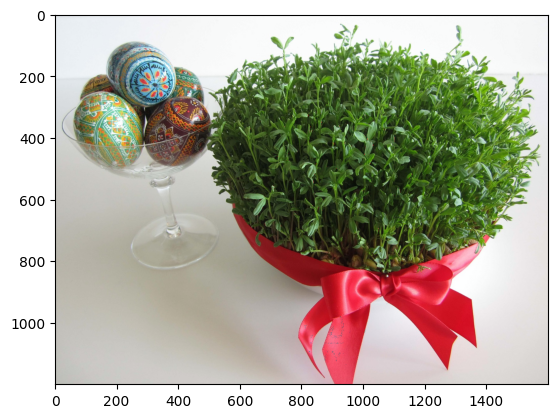

In [24]:
enc = encrypter(img, msg)
plt.imshow(enc)